# Aitraffic control

This project presents a python based implementation of various functionalities relevant to air traffic control operations. The system incorporates data structures and algorithms to manage airports, connections between them, and real-time capacity adjustments based on historical demand data.

The project utilizes a graph-based approach to model the network of airports and their connections. The system allows users to interact with the data through a menu-driven interface, offering functionalities such as displaying airport information, managing connections, computing minimum spanning trees, and finding shortest paths between airports. Additionally, the system dynamically adjusts airport capacities based on historical demand trends, enhancing operational efficiency.

Key components of the implementation include data structures for airports, connections, and the graph representation, along with algorithms for calculating minimum spanning trees and shortest paths. The system also integrates real-time data processing to adjust airport capacities, ensuring optimal resource utilization.


In [5]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import warnings

# loading data

In [6]:
df_airlines = pd.read_csv("airlines.csv")
df_airplanes = pd.read_csv("airplanes.csv")
df_airports = pd.read_csv("airports.csv")
df_routes = pd.read_csv("routes.csv")

In [7]:
df_airlines.head()

,Airline ID,Name,Alias,IATA,ICAO,Callsign,Country,Active
0,-1,Unknown,\N,-,NaN,\N,\N,Y
1,1,Private flight,\N,-,NaN,NaN,NaN,Y
2,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
3,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
4,4,2 Sqn No 1 Elementary Flying Training School,\N,NaN,WYT,NaN,United Kingdom,N


In [8]:
df_airplanes.head()

,Name,IATA code,ICAO code
0,Aerospatiale (Nord) 262,ND2,N262
1,Aerospatiale (Sud Aviation) Se.210 Caravelle,CRV,S210
2,Aerospatiale SN.601 Corvette,NDC,S601
3,Aerospatiale/Alenia ATR 42-300,AT4,AT43
4,Aerospatiale/Alenia ATR 42-500,AT5,AT45


In [9]:
df_airports.head()

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [29]:
df_routes.head()

,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Codeshare,Stops,Equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [30]:
#!pip install geopandas

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# Assuming you have already loaded the dataframes df_routes and df_airports
def show_airports():
    airports_data = df_airports[['Name', 'City', 'Country']].copy()
    airports_data.rename(columns={'Name': 'Airport Name', 'City': 'City Name', 'Country': 'Country Name'}, inplace=True)
    airports_data_sorted = airports_data.sort_values(by='Country Name')  # Sort by country name

    # Display information in a DataFrame format
    airports_df = airports_data_sorted.reset_index(drop=True)

    print("Airport Information:")
    print(airports_df.to_string(index=False))



def show_connections():
    print("List of Connections:")
    print(df_routes[['Source airport', 'Destination airport', 'Airline']])

def show_adjacency_matrix():
    # Create a graph from routes data
    G = nx.from_pandas_edgelist(df_routes, 'Source airport', 'Destination airport')
    adjacency_matrix = nx.adjacency_matrix(G).todense()
    print("Adjacency Matrix:")
    print(adjacency_matrix)

def print_minimum_spanning_tree():
    # Create a graph from routes data
    G = nx.from_pandas_edgelist(df_routes, 'Source airport', 'Destination airport')
    mst = nx.minimum_spanning_tree(G)
    print("Minimum Spanning Tree Edges:")
    print(list(mst.edges()))

def shortest_path_between_airports():
    source = input("Enter source airport: ")
    destination = input("Enter destination airport: ")
    # Create a graph from routes data
    G = nx.from_pandas_edgelist(df_routes, 'Source airport', 'Destination airport')
    shortest_path = nx.shortest_path(G, source, destination)
    all_shortest_paths = nx.all_shortest_paths(G, source, destination)
    print("Shortest Path between {} and {}: {}".format(source, destination, shortest_path))

def show_airport_capacities():
    # Placeholder for airport capacities if available
    print("Airport Capacities: Not implemented yet.")


In [11]:
# Main menu loop
while True:
    print("\nMenu:")
    print("1. Show Airports")
    print("2. Show Connections")
    print("3. Show Adjacency Matrix")
    print("4. Print Minimum Spanning Tree")
    print("5. Shortest path between two Airports")
    print("6. Show Airport Capacities")
    print("0. Exit")

    choice = int(input("Enter your choice: "))

    if choice == 1:
        show_airports()
    elif choice == 2:
        show_connections()
    elif choice == 3:
        show_adjacency_matrix()
    elif choice == 4:
        print_minimum_spanning_tree()
    elif choice == 5:
        shortest_path_between_airports()
    elif choice == 6:
        show_airport_capacities()
    elif choice == 0:
        print("Exiting...")
        break
    else:
        print("Invalid choice. Please try again.")


Menu:
1. Show Airports
2. Show Connections
3. Show Adjacency Matrix
4. Print Minimum Spanning Tree
5. Shortest path between two Airports
6. Show Airport Capacities
0. Exit
Airport Information:
                                                            Airport Name                         City Name                     Country Name
                                                         Bamiyan Airport                            Bamyan                      Afghanistan
                                                          Ghazni Airport                            Ghazni                      Afghanistan
                                                        Sharana Airstrip                           Sharona                      Afghanistan
                                                      Chakcharan Airport                       Chaghcharan                      Afghanistan
                                                          Konduz Airport                            Kunduz

# Displaying the airports across the world

In [ ]:
#pip install folium


Note: you may need to restart the kernel to use updated packages.


In [12]:
import folium
from folium.plugins import MarkerCluster
import seaborn as sns

def show_airports(country):
    airports_data = df_airports[['Name', 'City', 'Country', 'Latitude', 'Longitude']]
    airports_data_filtered = airports_data[airports_data['Country'] == country]
    
    if airports_data_filtered.empty:
        print("No airports found in the specified country.")
    else:
        # Create a map centered around the specified country
        country_map = folium.Map(location=[0, 0], zoom_start=2)
        
        # Create a MarkerCluster layer
        marker_cluster = MarkerCluster().add_to(country_map)

        # Add markers for airports in the country
        for idx, row in airports_data_filtered.iterrows():
            folium.Marker(
                location=[row['Latitude'], row['Longitude']],
                popup=row['Name'],
                tooltip=row['Name'],
                icon=folium.Icon(color='blue')
            ).add_to(marker_cluster)
        
        # Display the map
        return country_map

In [13]:
country_map = show_airports("India")
country_map

# Airport connections in the world

In [14]:
def show_connections(shapefile_path):
    import geopandas as gpd
    import matplotlib.pyplot as plt

    # Load the world map using the provided shapefile path
    world = gpd.read_file(shapefile_path)

    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plot the world map
    world.plot(ax=ax, color='lightgray', edgecolor='black')
    
    # Plot the connections between airports
    for index, row in df_routes.iterrows():
        src_airport = df_airports[df_airports['IATA'] == row['Source airport']]
        dst_airport = df_airports[df_airports['IATA'] == row['Destination airport']]
        if not src_airport.empty and not dst_airport.empty:
            src_coords = src_airport[['Longitude', 'Latitude']].values[0]
            dst_coords = dst_airport[['Longitude', 'Latitude']].values[0]
            ax.plot([src_coords[0], dst_coords[0]], [src_coords[1], dst_coords[1]], color='blue', alpha=0.5)
    
    # Customize the plot
    ax.set_title('Connections between Airports Worldwide', fontsize=16)
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_ylabel('Latitude', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.grid(True, linestyle='--', alpha=0.5)
    
    # Remove axis ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    plt.tight_layout()
    plt.show()


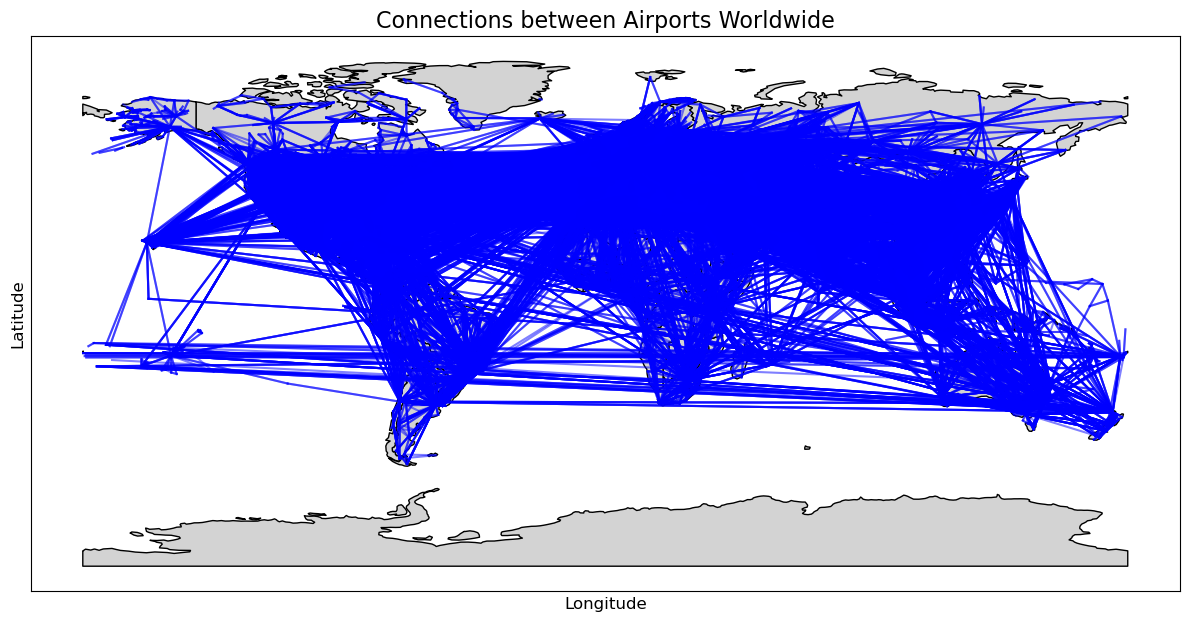

In [15]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

show_connections("ne_110m_admin_0_countries.shp")



# Minimum spanning Tree of all airport in the world

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx

def plot_minimum_spanning_tree(shapefile_path):
    # Load the world map from the provided shapefile
    world = gpd.read_file(shapefile_path)

    # Create a graph from the routes data
    G = nx.from_pandas_edgelist(df_routes, 'Source airport', 'Destination airport')
    mst = nx.minimum_spanning_tree(G)

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 8))
    world.plot(ax=ax, color='lightgray', edgecolor='black')

    # Plot the MST connections
    for u, v in mst.edges():
        src_airport = df_airports[df_airports['IATA'] == u]
        dst_airport = df_airports[df_airports['IATA'] == v]
        if not src_airport.empty and not dst_airport.empty:
            src_coords = src_airport[['Longitude', 'Latitude']].values[0]
            dst_coords = dst_airport[['Longitude', 'Latitude']].values[0]
            ax.plot(
                [src_coords[0], dst_coords[0]],
                [src_coords[1], dst_coords[1]],
                color='green',
                linewidth=0.5,
                alpha=0.8
            )

    # Customize the plot
    ax.set_title('Minimum Spanning Tree between Airports Worldwide', fontsize=16)
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_ylabel('Latitude', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks([])
    ax.set_yticks([])

    plt.tight_layout()
    plt.show()


In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)

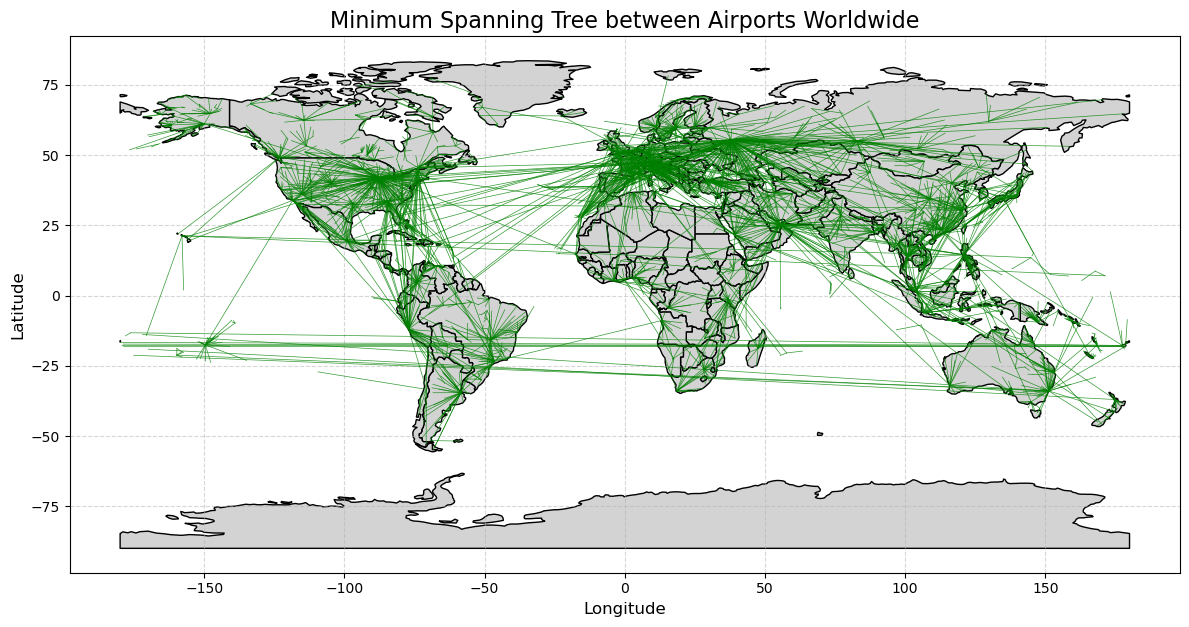

In [ ]:
plot_minimum_spanning_tree("ne_110m_admin_0_countries.shp")


# Ploting shortest(route) path between two Aiports

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import pandas as pd

# Load the CSV files
df_routes = pd.read_csv("routes.csv")
df_airports = pd.read_csv("airports.csv")

# Function to plot the routes between user-given airports on a world map
def plot_routes(G, source, destination, shortest_path, shapefile_path):
    # Load world map shapefile
    world = gpd.read_file(shapefile_path)
    
    # Plot world map
    plt.figure(figsize=(12, 7))
    ax = plt.gca()
    world.plot(ax=ax, color='white', edgecolor='black')

    try:
        # Plot source and destination airports
        source_airport = df_airports[df_airports['IATA'].str.upper() == source.upper()].iloc[0]
        destination_airport = df_airports[df_airports['IATA'].str.upper() == destination.upper()].iloc[0]

        ax.plot(source_airport['Longitude'], source_airport['Latitude'], 'bo', markersize=7, label='Source')
        ax.plot(destination_airport['Longitude'], destination_airport['Latitude'], 'go', markersize=7, label='Destination')

        # Plot shortest path
        for i in range(len(shortest_path) - 1):
            src = df_airports[df_airports['IATA'].str.upper() == shortest_path[i].upper()].iloc[0]
            dst = df_airports[df_airports['IATA'].str.upper() == shortest_path[i+1].upper()].iloc[0]
            ax.plot([src['Longitude'], dst['Longitude']], 
                    [src['Latitude'], dst['Latitude']], 
                    color='red', linewidth=2)

        ax.set_title(f'Shortest Flight Path: {source} → {destination}')
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        ax.legend()
        plt.tight_layout()
        sns.despine()
        plt.show()

    except IndexError:
        print("Error plotting route. Some airport data might be missing or incorrect.")

# Main function to compute shortest path between airports
def shortest_path_between_airports(shapefile_path):
    source = input("Enter source airport IATA code: ").strip().upper()
    destination = input("Enter destination airport IATA code: ").strip().upper()

    G = nx.from_pandas_edgelist(df_routes, 'Source airport', 'Destination airport')

    if source not in G or destination not in G:
        print(f"Error: One or both IATA codes not found in route network.")
        return

    try:
        shortest_path = nx.shortest_path(G, source, destination)
        print("Shortest Path:", " → ".join(shortest_path))
        plot_routes(G, source, destination, shortest_path, shapefile_path)
    except nx.NetworkXNoPath:
        print(f"No path found between {source} and {destination}.")

# Example usage
shortest_path_between_airports("ne_110m_admin_0_countries.shp")


# showing shortest Path between two Airport versus the alternative possible paths

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import pandas as pd

# Load CSV files
df_routes = pd.read_csv("routes.csv")
df_airports = pd.read_csv("airports.csv")

# Plot routes including shortest and top alternative paths
def plot_routes(G, source, destination, shortest_path, top_paths, shapefile_path):
    # Load world shapefile (e.g., ne_110m_admin_0_countries.shp)
    world = gpd.read_file(shapefile_path)

    plt.figure(figsize=(12, 7))
    ax = plt.gca()
    world.plot(ax=ax, color='white', edgecolor='black')

    # Source and destination airports
    try:
        source_airport = df_airports[df_airports['IATA'].str.upper() == source.upper()].iloc[0]
        destination_airport = df_airports[df_airports['IATA'].str.upper() == destination.upper()].iloc[0]
        ax.plot(source_airport['Longitude'], source_airport['Latitude'], 'bo', markersize=7, label='Source')
        ax.plot(destination_airport['Longitude'], destination_airport['Latitude'], 'go', markersize=7, label='Destination')

        # Plot shortest path in red
        for i in range(len(shortest_path) - 1):
            src = df_airports[df_airports['IATA'].str.upper() == shortest_path[i].upper()].iloc[0]
            dst = df_airports[df_airports['IATA'].str.upper() == shortest_path[i + 1].upper()].iloc[0]
            ax.plot([src['Longitude'], dst['Longitude']],
                    [src['Latitude'], dst['Latitude']],
                    color='red', linewidth=2, label='Shortest Path' if i == 0 else None)

        # Plot alternative top paths
        colors = ['blue', 'green', 'purple']
        for idx, path in enumerate(top_paths):
            if path == shortest_path:
                continue
            for i in range(len(path) - 1):
                src = df_airports[df_airports['IATA'].str.upper() == path[i].upper()].iloc[0]
                dst = df_airports[df_airports['IATA'].str.upper() == path[i + 1].upper()].iloc[0]
                ax.plot([src['Longitude'], dst['Longitude']],
                        [src['Latitude'], dst['Latitude']],
                        color=colors[idx % len(colors)], alpha=0.6, linewidth=1.5,
                        label=f'Route {idx + 2}' if i == 0 else None)

        ax.set_title(f'Flight Path: {source} to {destination}', fontsize=14)
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        ax.legend()
        plt.tight_layout()
        sns.despine()
        plt.show()

    except IndexError:
        print("Error: One or more airport coordinates not found for plotting.")

# Find shortest and top 3 unique shortest paths
def shortest_path_between_airports(shapefile_path):
    source = input("Enter source airport IATA code: ").strip().upper()
    destination = input("Enter destination airport IATA code: ").strip().upper()

    # Create route graph
    G = nx.from_pandas_edgelist(df_routes, 'Source airport', 'Destination airport')

    if source not in G or destination not in G:
        print(f"Error: {source} or {destination} not in route network.")
        return

    try:
        shortest_path = nx.shortest_path(G, source, destination)
        all_paths = list(nx.all_shortest_paths(G, source, destination))

        # Keep unique top 3 paths (sorted for consistency)
        unique_paths = []
        seen = set()
        for path in all_paths:
            path_tuple = tuple(path)
            if path_tuple not in seen:
                seen.add(path_tuple)
                unique_paths.append(path)
            if len(unique_paths) == 3:
                break

        print("\nShortest Path (Route 1):", shortest_path)
        for idx, path in enumerate(unique_paths[1:], start=2):
            print(f"Route {idx}:", path)

        plot_routes(G, source, destination, shortest_path, unique_paths, shapefile_path)

    except nx.NetworkXNoPath:
        print(f"No route found between {source} and {destination}.")

# Run the function
shortest_path_between_airports("ne_110m_admin_0_countries.shp")


# CODE Efficiency


Time Complexity Analysis:

Shortest path calculation using Dijkstra's algorithm: 
O((V + E) * log(V)), 
    V is the number of vertices.
Finding all shortest paths: O((V + E) * k), where k is the number of shortest paths.

Minimum spanning tree (MST) calculation: 
O(E * log(V)) using Kruskal's algorithm or O(V^2) using Prim's algorithm.
Plotting the routes: O(V + E), where V is the number of vertices.

Space Complexity Analysis:

Graph creation: O(V + E),
where V is the number of vertices and E is the number of edges.
Storing shortest paths: O(V + E) for each shortest path.
Storing minimum spanning tree: O(E) or O(V^2) depending on the algorithm used.

In [ ]:
import time

def analyze_efficiency():
    source = input("Enter source airport: ")
    destination = input("Enter destination airport: ")
    G = nx.from_pandas_edgelist(df_routes, 'Source airport', 'Destination airport')

    start_time = time.time()
    shortest_path = nx.shortest_path(G, source, destination)
    dijkstra_time = time.time() - start_time
    print("Dijkstra's Algorithm Execution Time:", dijkstra_time)

    start_time = time.time()
    mst = nx.minimum_spanning_tree(G)
    mst_time = time.time() - start_time
    print("Minimum Spanning Tree (MST) Execution Time:", mst_time)

    # Optionally, you can print the size of the graph for further analysis
    print("Number of Vertices (Airports):", len(G.nodes()))
    print("Number of Edges (Routes):", len(G.edges()))

#efficiency analysis
analyze_efficiency()


Enter source airport: BBI
Enter destination airport: YYZ
Dijkstra's Algorithm Execution Time: 0.0
Minimum Spanning Tree (MST) Execution Time: 0.09942293167114258
Number of Vertices (Airports): 3425
Number of Edges (Routes): 19257
